In [210]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

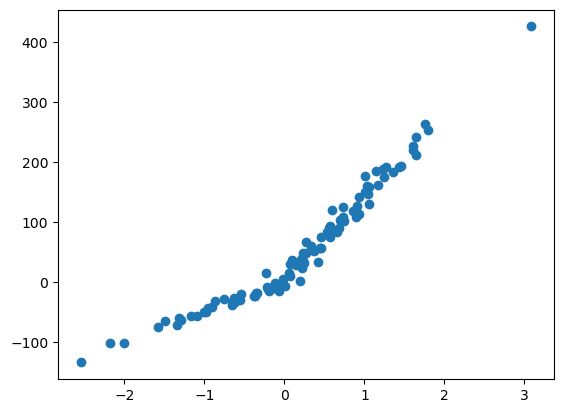

In [211]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y + abs(y/2)

plt.scatter(x, y)

In [212]:
print(x.shape)
print(y.shape)


(100, 1)
(100,)


In [213]:
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)


In [214]:
gx = np.hstack((x, np.ones(x.shape)))
gx = np.hstack((x**2, gx))
print(gx.shape)
print(gx[:10])

(100, 3)
[[ 0.42592248 -0.65262736  1.        ]
 [ 0.01165458 -0.10795638  1.        ]
 [ 0.57209125 -0.75636714  1.        ]
 [ 0.01261779 -0.11232896  1.        ]
 [ 1.37915901  1.17437601  1.        ]
 [ 0.13745175 -0.37074485  1.        ]
 [ 0.43354101 -0.65843831  1.        ]
 [ 0.79629003  0.89235084  1.        ]
 [ 0.03884413  0.19708914  1.        ]
 [ 1.59984135  1.26484835  1.        ]]


In [215]:
theta = np.random.randn(3, 1)

In [216]:
theta

array([[ 1.44737102],
       [-0.74588097],
       [ 0.38039616]])

In [217]:
theta.shape

(3, 1)

In [218]:
def model(gx, theta):
    return gx.dot(theta)

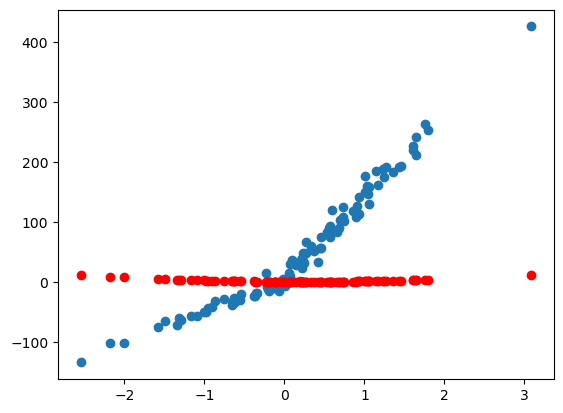

In [219]:
plt.scatter(x, y)
plt.scatter(x, model(gx, theta), c="r")

In [220]:
def cost_f(gx, y, theta):
    m = len(y)
    return 1/(m*2) * np.sum((model(gx, theta) - y)**2)

In [221]:
cost_f(gx, y, theta)

6128.694319512353

In [222]:
def grad(gx, y, theta):
    m = len(y)
    return 1/m * gx.T.dot(model(gx, theta) - y)

In [223]:
grad(gx, y, theta)

array([[-92.74614855],
       [-98.41961799],
       [-52.05995936]])

In [224]:
def grad_d(gx, y, theta, l_rate, n_itr):
    cost_history = np.zeros(n_itr)
    for i in range(0, n_itr) :
        theta = theta - l_rate * grad(gx, y, theta)
        cost_history[i] = cost_f(gx, y, theta)
        return theta, cost_history

In [290]:
theta_final, cost_history = grad_d(gx, y, theta, l_rate=0.5, n_itr=1000)

In [291]:
theta_final

array([[47.8204453 ],
       [48.46392803],
       [26.41037584]])

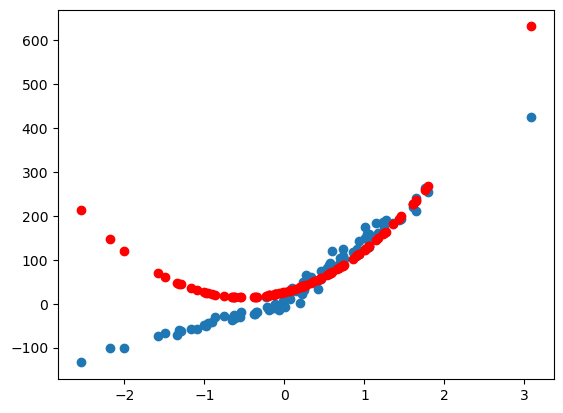

In [292]:
prediction = model(gx, theta_final)
plt.scatter(x, y)
plt.scatter(x, prediction, c='r')

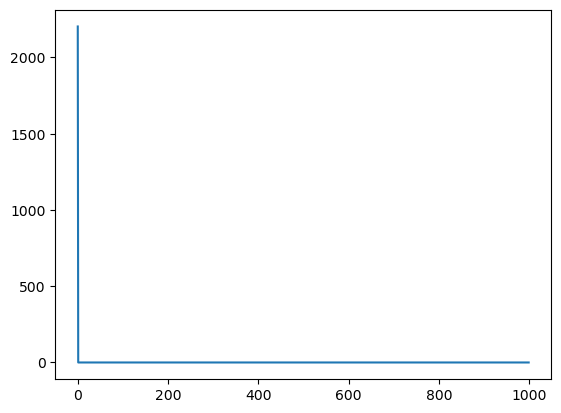

In [293]:
plt.plot(range(1000), cost_history)

In [294]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [295]:
coef_determination(y, prediction)

0.5384239993170976